#Classification of image wheather it's a pizza or steak

In [1]:
#Download a data set and unzipit.
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-01-28 16:21:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 142.250.99.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   240MB/s    in 0.4s    

2022-01-28 16:21:47 (240 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [2]:
#Let's walk the data set which we are downloaded
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/test

pizza  steak


In [4]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [5]:
#Let find out the class_name in case of multiclass labels this is very much usefull
import pathlib
import numpy as np

#data_dir = pathlib.Path("pizza_steak/train/")
path_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in path_dir.glob("*")]))

print(class_names)

['pizza' 'steak']


We are having the two class pizza and steak for multiclass model it good to write code to examine how many classes are there

In [6]:
#Now find ou how many images are there.
import os 

len(os.listdir("pizza_steak/train/pizza"))

750

In [7]:
import os

#Just go by the order of dirpath, dirnames, filenames.
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f'There are {len(dirnames)} directories with {len(filenames)} images in {dirpath}.')

There are 2 directories with 0 images in pizza_steak.
There are 2 directories with 0 images in pizza_steak/test.
There are 0 directories with 250 images in pizza_steak/test/pizza.
There are 0 directories with 250 images in pizza_steak/test/steak.
There are 2 directories with 0 images in pizza_steak/train.
There are 0 directories with 750 images in pizza_steak/train/pizza.
There are 0 directories with 750 images in pizza_steak/train/steak.


In [8]:
#we just explore the data set now we are going to Visualize the datasets.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

def image_show(target_dir, target_class):

  #Creating a target folder
  target_folder = target_dir+target_class

  #Creating a random_image
  random_image = random.sample(os.listdir(target_folder),1)

  #Give the image path and convert into tensor and then visualize the image

  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.title(target_class)
  plt.imshow(img)
  
  print(f'Image_shape{img.shape}')
  return img


Image_shape(512, 512, 3)


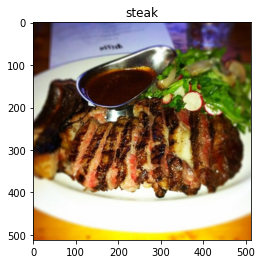

In [9]:
img = image_show(target_dir = "pizza_steak/train/", target_class="steak")

In [10]:
img/225.

array([[[0.12888889, 0.05777778, 0.        ],
        [0.12888889, 0.05777778, 0.        ],
        [0.12888889, 0.05777778, 0.        ],
        ...,
        [0.2       , 0.08      , 0.00444444],
        [0.2       , 0.08      , 0.00444444],
        [0.20444444, 0.08444444, 0.00888889]],

       [[0.12888889, 0.05777778, 0.        ],
        [0.12888889, 0.05777778, 0.        ],
        [0.13333333, 0.06222222, 0.00444444],
        ...,
        [0.19555556, 0.07111111, 0.00888889],
        [0.2       , 0.08      , 0.00444444],
        [0.2       , 0.08      , 0.00444444]],

       [[0.13333333, 0.06222222, 0.00444444],
        [0.13333333, 0.06222222, 0.00444444],
        [0.13333333, 0.05777778, 0.01333333],
        ...,
        [0.19555556, 0.07111111, 0.00888889],
        [0.19555556, 0.07111111, 0.00888889],
        [0.19555556, 0.07111111, 0.00888889]],

       ...,

       [[0.79555556, 0.34666667, 0.        ],
        [0.8       , 0.35111111, 0.        ],
        [0.8       , 0

As of now i just downloaded the data set and Explore it and visualized. And the next phase we are going to build the model to classify the images.

Image_shape(512, 512, 3)


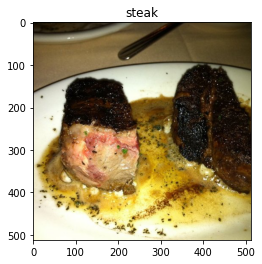

In [11]:
img1 = image_show(target_dir="pizza_steak/train/", target_class="steak")

###Model building

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from tensorflow.keras.optimizers import Adam

In [13]:
#Training and test directory
train_dir = "pizza_steak/train/"
test_dir ="pizza_steak/test/"

#Scaling the image size within 225
train_datagen = ImageDataGenerator(rescale=1/225.)
test_datagen =ImageDataGenerator(rescale=1/225.)

#Turn into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              target_size =(224,224),
                                              batch_size=32,
                                              class_mode="binary")
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode="binary")#We are using binary because we are dealing with pizza and steak only



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:
model = Sequential([
   Conv2D(filters=10, kernel_size=3, activation="relu",strides=1, padding="valid", input_shape=(224, 224, 3)),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(2),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(2),
   Conv2D(10,3, activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation="sigmoid")
])

In [15]:
model.compile(loss ="binary_crossentropy",
              optimizer=Adam(),
              metrics =["accuracy"])

In [16]:
history = model.fit(train_data,
          epochs=5, 
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 426ms/step - loss: 0.6109 - accuracy: 0.6560 - val_loss: 0.5270 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4939 - accuracy: 0.7720 - val_loss: 0.3837 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4165 - accuracy: 0.8213 - val_loss: 0.3417 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4156 - accuracy: 0.8180 - val_loss: 0.3338 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3775 - accuracy: 0.8300 - val_loss: 0.3327 - val_accuracy: 0.8580


###Creating a helper function to visualize the validation, acuracy loss and gain

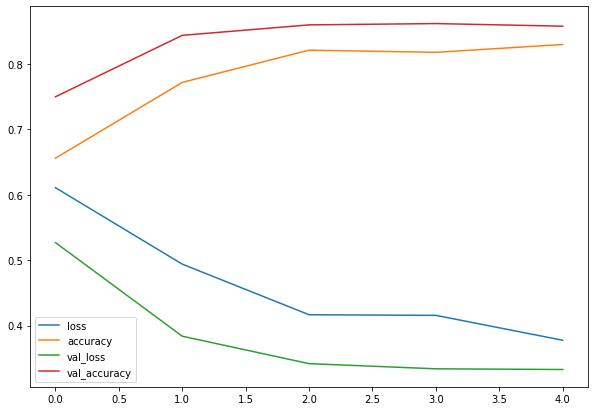

In [17]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,7))

In [18]:
## we are not able to uunderstand muxh from the diagram, lets create two plot(accuracy and loss)

def model_performance(history):

  loss = history.history["loss"]
  accuracy = history.history["accuracy"]

  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="validation_loss")
  plt.title("loss_curve")
  plt.xlabel("Epochs")
  plt.legend()
  
  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy_plot")
  plt.xlabel("Epochs")
  plt.legend();

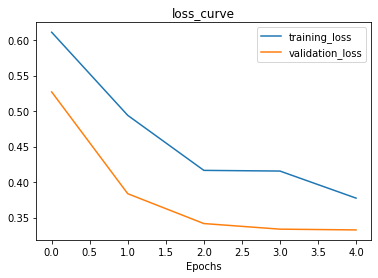

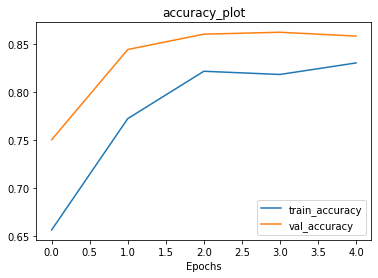

In [19]:
model_performance(history)

In [20]:
model.evaluate(test_data)

16/16 [==============================] - 2s 138ms/step - loss: 0.3327 - accuracy: 0.8580


[0.3327469229698181, 0.8579999804496765]

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 10)        9

From this we will say our model ,perform better in both training and test set, we are going to increase our model performance by data augumentation process..

Let's create a model... I am so exicited

###Preprocessing

In [22]:
#Create a test and train directory
train_dir1 = "pizza_steak/train/"
test_dir1 = "pizza_steak/test/"

#Image scaling

#Data augumentation improves the accuracy..Let's do it
train_datagen_augument = ImageDataGenerator(rescale=1/255., 
                                            rotation_range=20, 
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)


test_datagen1 = ImageDataGenerator(rescale=1/225.)


#Turning into batches

#Augumented data as an input
train_data1 = train_datagen_augument.flow_from_directory(directory = train_dir1,
                                                      batch_size =32,
                                                      target_size=(224,224),
                                                      class_mode="binary")

test_data1 = test_datagen1.flow_from_directory(directory=test_dir1,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


###Model building

In [23]:
#Building a Convolution neural network model

model1 = Sequential([
    Conv2D(filters=10, kernel_size=3,input_shape= (224,224,3), activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#Compile a model
model1.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

#Model_fitting
history1 = model1.fit(train_data1,
                      epochs=5,
                      steps_per_epoch=len(train_data1), 
                      validation_data=test_data1, 
                      validation_steps=len(test_data1))

Epoch 1/5
47/47 [==============================] - 23s 488ms/step - loss: 0.6317 - accuracy: 0.6433 - val_loss: 0.5061 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 25s 532ms/step - loss: 0.5286 - accuracy: 0.7300 - val_loss: 0.3755 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 23s 481ms/step - loss: 0.4847 - accuracy: 0.7767 - val_loss: 0.3480 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 23s 484ms/step - loss: 0.4812 - accuracy: 0.7727 - val_loss: 0.3971 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 23s 489ms/step - loss: 0.4652 - accuracy: 0.7813 - val_loss: 0.3220 - val_accuracy: 0.8600


In [24]:
model1.evaluate(test_data1)

16/16 [==============================] - 2s 140ms/step - loss: 0.3220 - accuracy: 0.8600


[0.32200857996940613, 0.8600000143051147]

In [25]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 10)       

In [26]:
model.evaluate(test_data)

16/16 [==============================] - 2s 143ms/step - loss: 0.3327 - accuracy: 0.8580


[0.3327468931674957, 0.8579999804496765]

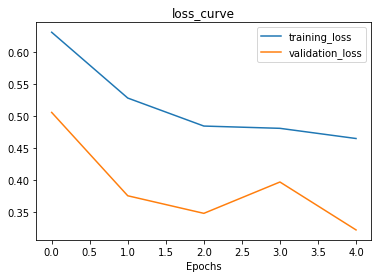

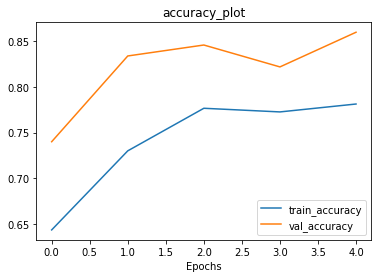

In [27]:
model_performance(history1)

By adjusting augumented data and simplifing the model, changing the hyperparameter we can improve the model

###Lets predicts the custom data

--2022-01-28 16:25:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.6’

03-steak.jpeg.6     100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-01-28 16:25:04 (44.5 MB/s) - ‘03-steak.jpeg.6’ saved [1978213/1978213]



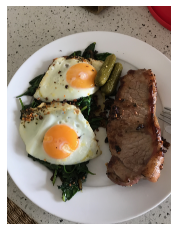

In [28]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

steak =mpimg.imread("03-steak.jpeg")
plt.axis(False)
plt.imshow(steak);


In [29]:
steak.shape

(4032, 3024, 3)

Shape is different so we will change this into 224 and process it

In [47]:
def load_and_prep_image(filename):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=(224,224))
  img = img/225.

  return img

In [49]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [82]:
def pred_plot(model, filename):

  #Converting the image into right size
  img = load_and_prep_image(filename)

  #Predicting the image
  pred = model1.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]
  
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


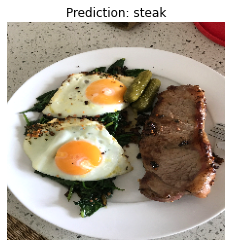

In [83]:
pred_plot(model1, "03-steak.jpeg")

In [78]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 

--2022-01-28 17:12:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2022-01-28 17:12:03 (56.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


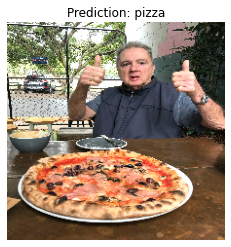

In [81]:
pred_plot(model1, "03-pizza-dad.jpeg",class_names)